In [ ]:
import importlib
import optuna

In [0]:
from analysis_functions import *

In [19]:
importlib.reload(sys.modules['analysis_functions'])
from analysis_functions import *

In [8]:
X_stress_components_new = opener('X_stress_components_new', path_import='./resourses/')
X_strain_components_new = opener('X_strain_components_new', path_import='./resourses/')
y_stress_components_new = opener('y_stress_components_new', path_import='./resourses/')
y_strain_components_new = opener('y_strain_components_new', path_import='./resourses/')
# X_stress_components_other = opener('X_stress_components_other')
# X_strain_components_other = opener('X_strain_components_other')
# y_stress_components_other = opener('y_stress_components_other')
# y_strain_components_other = opener('y_strain_components_other')

./resourses//X_stress_components_new.pkl
./resourses//X_strain_components_new.pkl
./resourses//y_stress_components_new.pkl
./resourses//y_strain_components_new.pkl


In [9]:
X_stress_components_new.shape

(3, 2678, 5)

In [30]:
df_results = pd.DataFrame(
    columns=[
            # Constructional
             'n_layers', 'n_neurons', 'solver', 'max_iter',
             'learning_rate_init', 'learning_rate', 'early_stopping',
             'activation', 'n_splits', 'alpha',

            # Resultant _val
             'explained_variance_score_val', 'median_absolute_error_val',
             'mean_squared_error_val', 'mean_absolute_error_val',
             'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
             'explained_variance_score_test', 'median_absolute_error_test',
             'mean_squared_error_test', 'mean_absolute_error_test',
             'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]
    )

In [21]:
component_num = 1
n_trials_list = [10, 50, 100, 200, 500]

In [ ]:
best_params_list = []

In [20]:
for n_trials in n_trials_list:
    best_params, cur_X_test, cur_y_test = do_optuna(X_stress_components_new[component_num],
                                                    y_stress_components_new[component_num],
                                                    n_trials)
    best_params_list.append(best_params)

[I 2024-10-07 23:50:26,060] A new study created in memory with name: no-name-b18ea87f-bf1b-4f66-8951-6fdb6d49709d
/Users/i.grebenkin/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/i.grebenkin/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


KeyboardInterrupt: 

In [164]:
path_to_save_model = './learned_models/'

for i, best_params in enumerate(best_params_list):
    optuna_200_3cv, cur_prediction, cur_y_test, cur_X_test = test_after_opt(
        best_params, X_stress_components[component_num], y_stress_components[component_num],
        f'optuna_{n_trials_list[i]}_3cv', path_to_save_model)

saved in d:\учеба/optuna_200_3cv.pkl
test rmse =  4.872450206028714


C:\Users\acer\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [60]:
sns.set_style('whitegrid')

In [96]:
import shutil

def plot_results(x, y, model_name, do_zip=False, dpi=500, delete_and_rewrite=True):
    cur_X_test, cur_y_test, *_ = get_train_test(x, y)

    model = opener(model_name)
    cur_prediction = model.predict(cur_X_test)
    print('rmse = ', np.sqrt(mean_squared_error(cur_y_test, cur_prediction)))
    
    if delete_and_rewrite:
        os.makedirs(model_name, exist_ok=True)
    
    for i, item in enumerate(cur_X_test[::20]):
        fig = plt.figure(figsize=(5, 4))
        plt.plot(
            cur_X_test[i*20:(i+1)*20, -1],
            cur_prediction[i*20:(i+1)*20],
            '-o',
            label='predicted'
        )
        plt.plot(
            cur_X_test[i*20:(i+1)*20, -1],
            cur_y_test[i*20:(i+1)*20],
            '-o',
            label='real'
        )
        title = f'red {item[0]}, cal {item[1]}, alpha {int(item[2])}, fric {item[3]}'
        plt.title(title)
        plt.legend(loc='best')
        plt.xlabel('r, -')
        plt.ylabel('$\sigma$, MPa')
        # plt.show()
        plt.savefig(''.join((model_name, '/', title, '.png')), format='png', dpi=dpi)
        plt.close()
        # break
    if do_zip: shutil.make_archive(model_name, 'zip', model_name)

In [102]:
X_stress_components[0].max(axis=0)

array([ 0.3,  1. , 20. ,  0.1])

In [97]:
plot_results(
    X_stress_components[0],
    y_stress_components[0],
    'optuna_200_3cv_no_SS',
    do_zip=True
)

d:\учеба/optuna_200_3cv_no_SS.pkl
rmse =  1.376178095536843


In [98]:
plot_results(
    X_stress_components[0],
    y_stress_components[0],
    'optuna_200_3cv',
    do_zip=True
)

d:\учеба/optuna_200_3cv.pkl
rmse =  4.872450206028714


In [99]:
-63 + 76 * 10

697

'd:\\учеба\\optuna_200_3cv.zip'

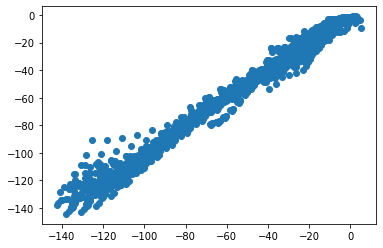

In [175]:
plt.scatter(cur_prediction, cur_y_test)

In [158]:
best_h = {'n_layers': 2, 'n_units_0': 85, 'n_units_1': 91, 'learning_rate_init': 0.003344995003828158, 'early_stopping': False, 'max_iter': 8233, 'learning_rate': 'constant', 'alpha': 0.0001, 'activation': 'tanh', 'solver': 'adam'}

test_after_opt(best_h, X_stress_components[0], y_stress_components[0], 'optuna_200_3cv_no_SS')

saved in d:\учеба/optuna_200_3cv_no_SS.pkl
test rmse =  1.376178095536843


In [ ]:
results_0_component = pd.read_csv(path_import+'recalculation_results_0_component.csv',
                                  names=[
            # Constructional
            'n_layers', 'n_neurons', 'solver', 'max_iter',
            'learning_rate_init', 'learning_rate', 'early_stopping',
            'activation', 'n_splits', 'alpha',

            # Resultant _val
            'explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]).drop_duplicates()
results_0_component.head()

,n_layers,n_neurons,solver,max_iter,learning_rate_init,learning_rate,early_stopping,activation,n_splits,alpha,...,AIC_val,BIC_val,explained_variance_score_test,median_absolute_error_test,mean_squared_error_test,mean_absolute_error_test,r2_score_test,max_error_test,AIC_test,BIC_test
0,2,2,adam,200,0.001,constant,True,relu,5,0.0001,...,54543.815746,54644.760511,0.842750,11.762512,251.922608,12.877527,0.842725,56.989996,55319.219291,55420.164057
1,4,5,adam,200,0.001,constant,True,relu,5,0.0001,...,31544.772304,31905.289322,0.986530,2.352294,21.599641,3.283812,0.986515,36.607462,30826.766749,31187.283768
2,2,3,adam,200,0.001,constant,True,relu,5,0.0001,...,38493.570540,38666.618709,0.978327,3.262943,34.724939,4.322631,0.978321,42.982646,35522.581314,35695.629483
3,4,7,adam,200,0.001,constant,True,relu,5,0.0001,...,37931.385421,38537.054013,0.991280,1.944521,13.973688,2.664646,0.991276,26.101130,26539.761304,27145.429895
4,2,4,adam,200,0.001,constant,True,relu,5,0.0001,...,35205.087055,35464.659309,0.982151,2.557523,28.601269,3.760534,0.982144,39.668001,33606.510869,33866.083122


In [ ]:
results_1_component = pd.read_csv(path_import+'results_1_component.csv',
                                  names=[
            # Constructional
            'n_layers', 'n_neurons', 'solver', 'max_iter',
            'learning_rate_init', 'learning_rate', 'early_stopping',
            'activation', 'n_splits', 'alpha',

            # Resultant _val
            'explained_variance_score_val', 'median_absolute_error_val',
            'mean_squared_error_val', 'mean_absolute_error_val',
            'r2_score_val', 'max_error_val', 'AIC_val', 'BIC_val',

            # Resultant _test
            'explained_variance_score_test', 'median_absolute_error_test',
            'mean_squared_error_test', 'mean_absolute_error_test',
            'r2_score_test', 'max_error_test', 'AIC_test', 'BIC_test'
            ]).drop_duplicates()
results_1_component.head()

,n_layers,n_neurons,solver,max_iter,learning_rate_init,learning_rate,early_stopping,activation,n_splits,alpha,...,AIC_val,BIC_val,explained_variance_score_test,median_absolute_error_test,mean_squared_error_test,mean_absolute_error_test,r2_score_test,max_error_test,AIC_test,BIC_test
0,7,200,adam,200,0.001,constant,True,relu,5,0.0001,...,145198.005914,440821.961165,0.985385,8.741612,212.613987,11.112629,0.985227,52.399585,135594.782537,431218.737788
1,7,200,adam,200,0.001,constant,True,relu,5,0.0001,...,130331.071184,425955.026435,0.994822,5.219850,74.987131,6.657077,0.994790,34.996882,125173.165126,420797.120377
2,2,2,adam,200,0.001,constant,True,relu,5,0.0001,...,90959.220379,91060.165144,0.508401,54.633901,9006.520175,73.566906,0.374214,286.090928,91085.040579,91185.985344
3,2,3,adam,200,0.001,constant,True,relu,5,0.0001,...,76737.779823,76910.827992,0.839759,29.762105,2326.767951,37.396806,0.838333,183.336829,77570.354381,77743.402550
4,2,4,adam,200,0.001,constant,True,relu,5,0.0001,...,74948.925772,75208.498026,0.859535,25.850148,2035.391638,34.284135,0.858578,151.143623,76256.435304,76516.007558


# KAN 

In [ ]:
%pip install pykan

In [ ]:
from kan import *

In [ ]:
cur_X_test, cur_y_test, val_list_X, val_list_y, train_list_X, train_list_y=\
    split_transform_one_comp_cv(X_stress_components[0], y_stress_components[0])

In [ ]:
train_list_X[0].shape, train_list_y[0].shape

((10000, 5), (10000,))

In [ ]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

# my_x = [np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])] # a list of numpy arrays
my_x = [train_list_X[0], val_list_X[0]] # a list of numpy arrays
my_x = train_list_X[0].T # a list of numpy arrays
# my_y = [np.array([4.]), np.array([2.])] # another list of numpy arrays (targets)
my_y = [train_list_y[0], val_list_y[0]] # another list of numpy arrays (targets)
my_y = train_list_y[0] # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

test_tensor_x = torch.Tensor(cur_X_test.T)
test_tensor_y = torch.Tensor(cur_y_test)

# my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
# my_dataloader = DataLoader(my_dataset) # create your dataloader

my_dataset = {
    'train_input': tensor_x,
    'test_input': test_tensor_x,
    'train_label': tensor_y,
    'test_label': test_tensor_y
}

In [ ]:
from kan import *
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[5,5,5,1], seed=0)

In [ ]:
model.fit(my_dataset, opt="LBFGS", steps=200);

description:   0%|                                                          | 0/200 [00:00<?, ?it/s]

train loss: 1.11e+00 | test loss: 1.18e+02 | reg: 1.66e+02 : 100%|█| 200/200 [01:29<00:00,  2.23it/s


In [ ]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with sin, r2=0.9999986290931702, c=2
fixing (0,0,1) with sin, r2=0.9999995231628418, c=2
fixing (0,0,2) with x, r2=0.999941349029541, c=1
fixing (0,0,3) with x, r2=0.9998865127563477, c=1
fixing (0,0,4) with x, r2=0.9999542832374573, c=1
fixing (0,1,0) with x, r2=0.9999576210975647, c=1
fixing (0,1,1) with x, r2=0.9999326467514038, c=1
fixing (0,1,2) with x, r2=0.9999233484268188, c=1
fixing (0,1,3) with sin, r2=0.9999462962150574, c=2
fixing (0,1,4) with x, r2=0.9999756217002869, c=1
fixing (0,2,0) with x, r2=0.9999236464500427, c=1
fixing (0,2,1) with x^2, r2=0.9999963641166687, c=2
fixing (0,2,2) with x, r2=0.9999983310699463, c=1
fixing (0,2,3) with x^2, r2=0.9999998211860657, c=2
fixing (0,2,4) with sin, r2=0.9999967813491821, c=2
fixing (0,3,0) with x, r2=0.9999306797981262, c=1
fixing (0,3,1) with x, r2=0.9999998807907104, c=1
fixing (0,3,2) with x, r2=0.999990701675415, c=1
fixing (0,3,3) with x, r2=0.9999019503593445, c=1
fixing (0,3,4) with x, r2=0.999905586242

In [ ]:
# sf = model.symbolic_formula()[0][0]
# nsimplify(ex_round(ex_round(sf, 3),3))

In [ ]:
from kan.utils import ex_round

# ex_round(model.symbolic_formula()[0][0],4)

In [ ]:
f = model.symbolic_formula()[0][0]

In [ ]:
f

-1.54669166360231*x_2 - 3.31295539548807*x_3 + 1.57583195790505*x_4 - 0.00326144078050742*x_5 - 0.000146400295347953*(-0.671414165471708*x_3 - 1)**2 - 0.323873020437706*(-0.15480410876998*x_1 + 0.146844738480618*x_2 + 0.0628593881525092*x_4 + 0.0675009044391977*x_5 + sin(0.340479671955109*x_3 - 1.55071949958801) - 0.82313756022447)**2 - 8.82646008066509*(0.0321034967066455*x_1 - 0.100472280673639*x_4 - 0.0865586585688791*(-0.121414796739345*x_3 - 1)**2 + 0.0352802637934736*sin(0.875839829444885*x_2 + 0.756799638271332) + sin(0.303839713335037*x_5 - 1.39951956272125) + 0.707137406692046)**2 - 7.1577256095624*(0.0321034967066455*x_1 - 0.100472280673639*x_4 - 0.0865586585688791*(-0.121414796739345*x_3 - 1)**2 + 0.0352802637934736*sin(0.875839829444885*x_2 + 0.756799638271332) + sin(0.303839713335037*x_5 - 1.39951956272125) + 0.727241513967702)**2 - 0.427360887138883*(0.0349087262562396*x_1 + 0.117071825441412*x_2 + 0.0122029407319934*x_3 - 0.0390767660814758*x_4 + 0.0617690984929735*x_5 -

In [ ]:
# Assuming you have a trained KAN model

formula1, formula2 = model.symbolic_formula()

In [ ]:
import numpy as np
import sympy as sp
from sympy import sin, cos, symbols, lambdify


f = lambdify(formula2, formula1, 'numpy')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: >

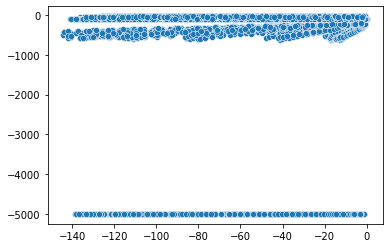

In [ ]:
import seaborn as sns

preds = np.zeros_like(train_list_y[0])
for i, row in enumerate(train_list_X[0]):
    preds[i] = np.clip(f(*row)[0], -5000, 5000)

sns.scatterplot(train_list_y[0], preds)

In [ ]:
'zeides_2a_8_red_2000_cal_10_vel_10_fric_025',
'zeides_2a_8_red_2000_cal_75_vel_10_fric_050',
'zeides_2a_8_red_2500_cal_30_vel_10_fric_0100',
'zeides_2a_8_red_250_cal_0_vel_10_fric_025',
'zeides_2a_8_red_2000_cal_30_vel_10_fric_050'